In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize,scale,MinMaxScaler
import os
from scipy.linalg import svd
from PIL import Image
from skimage.transform import resize

## Question 1

## a)

In [2]:
m = 10
A = np.random.rand(m,m)
M = np.tril(A,-1) + np.tril(A).T
M

array([[0.61445348, 0.05319456, 0.33591858, 0.35813648, 0.42944242,
        0.6391343 , 0.71302775, 0.26351478, 0.00306352, 0.67857658],
       [0.05319456, 0.39383777, 0.22656171, 0.71697714, 0.3839783 ,
        0.18778691, 0.3958911 , 0.900663  , 0.25074505, 0.36862544],
       [0.33591858, 0.22656171, 0.75763712, 0.43740134, 0.2211221 ,
        0.19151139, 0.82665616, 0.33692717, 0.97386215, 0.22422378],
       [0.35813648, 0.71697714, 0.43740134, 0.87965585, 0.05248136,
        0.43263237, 0.12130253, 0.43503956, 0.79050751, 0.58707418],
       [0.42944242, 0.3839783 , 0.2211221 , 0.05248136, 0.48063946,
        0.20400167, 0.75701043, 0.10485128, 0.58966644, 0.61216402],
       [0.6391343 , 0.18778691, 0.19151139, 0.43263237, 0.20400167,
        0.05102529, 0.21159069, 0.07238449, 0.72660934, 0.18701924],
       [0.71302775, 0.3958911 , 0.82665616, 0.12130253, 0.75701043,
        0.21159069, 0.85955635, 0.6188966 , 0.11639382, 0.63518978],
       [0.26351478, 0.900663  , 0.3369271

In [3]:
eig_values, eig_vectors = np.linalg.eig(M)

In [4]:
eig_values

array([ 4.39586078,  1.40609433, -1.32076831,  0.75747893,  0.82806344,
       -0.72741951,  0.3349136 , -0.48094049,  0.00703552, -0.24188403])

In [5]:
eig_vectors

array([[-0.28547841, -0.4057196 ,  0.21603341, -0.52963172,  0.09596148,
         0.32062281,  0.27747263,  0.4185221 , -0.24256354,  0.06096742],
       [-0.28484228,  0.21537432,  0.2754443 ,  0.29569931,  0.4716236 ,
        -0.22010098, -0.01592359,  0.39418902, -0.00139643, -0.53165532],
       [-0.3449757 ,  0.04059717, -0.2672266 ,  0.21920088, -0.65187869,
        -0.16913024,  0.32748015,  0.39966638,  0.19480921, -0.03750453],
       [-0.34605891,  0.48112919, -0.14815495, -0.35616784,  0.19707696,
         0.28919819,  0.20097277, -0.23301126,  0.53142103, -0.01962056],
       [-0.27854606, -0.31386782, -0.30187038,  0.04939864,  0.00666005,
         0.27043412, -0.74733495,  0.16902648,  0.25639493, -0.06585072],
       [-0.21379745,  0.05691964, -0.33944089, -0.45591542, -0.1353913 ,
        -0.36778344, -0.13722344, -0.2676811 , -0.42279245, -0.45292324],
       [-0.37945973, -0.51257541,  0.20613775,  0.30651912, -0.023932  ,
         0.06141743,  0.23758327, -0.58316564

In [6]:
# LARGEST EIGENVALUE AND THE CORRESPONDING EIGENVECTOR
print(eig_values[0])
print(eig_vectors[:,0])

4.395860779970108
[-0.28547841 -0.28484228 -0.3449757  -0.34605891 -0.27854606 -0.21379745
 -0.37945973 -0.33115237 -0.35562355 -0.30852067]


## b) 

4.395860779969537
[0.2854784  0.28484217 0.34497577 0.34605889 0.2785462  0.21379754
 0.37945974 0.33115247 0.35562331 0.30852069]


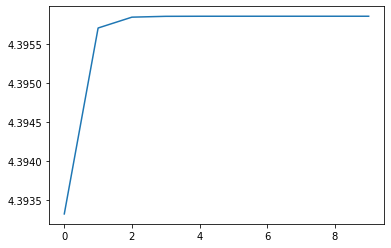

In [7]:
# POWER ITERATION
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.ones(m)
for i in range(num_it):
    it_vector = np.dot(M,it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

#### Observation: 

Power iteration was able to find the largest eigenvalue and the corresponding eigenvector accurately for a symmetric matrix

## c)

## Method #1: Random Guessing

0.7574789326745772
[-0.52963172  0.29569931  0.21920088 -0.35616784  0.04939864 -0.45591542
  0.30651912  0.37098293 -0.00787555 -0.12330524]


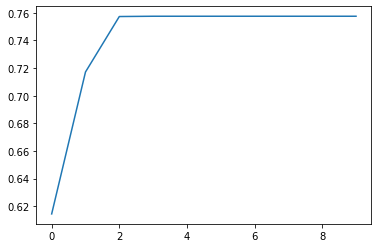

In [11]:
# Rayleigh Quotient iteration initial guess [1,0,0,0,0,0,0,0,0,0]
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.zeros(m) # initial vector guess
it_vector[0] = 1
for i in range(num_it):
    it_value[i] = np.linalg.multi_dot([it_vector.T,M,it_vector])
    it_vector = np.dot(np.linalg.inv(M-it_value[i]*np.eye(m)),it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

In [32]:
num_it = 10
it_values = []
it_vectors = []

# Try standard basis vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = 1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+2,10)] = 2
    it_vector[np.mod(i+4,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+2,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+4,10)] = -1
    it_vector[np.mod(i+5,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try these vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[np.mod(i+1,10)] = 1
    it_vector[np.mod(i+2,10)] = 1
    it_vector[np.mod(i+3,10)] = -1
    it_vector[np.mod(i+4,10)] = 1
    it_vector[np.mod(i+6,10)] = -1
    it_vector[np.mod(i+8,10)] = -1
    it_vector[np.mod(i+9,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

# PRINT ALL EIGENVECTORS AND EIGENVALUES
print(len(it_values))
sorted(zip(it_values,it_vectors),reverse=True)

9


[(4.39586078,
  array([-0.28547841, -0.28484228, -0.3449757 , -0.34605891, -0.27854606,
         -0.21379745, -0.37945973, -0.33115237, -0.35562355, -0.30852067])),
 (1.406094325,
  array([-0.4057196 ,  0.21537432,  0.04059717,  0.48112919, -0.31386782,
          0.05691964, -0.51257541,  0.17959186,  0.36881414, -0.15201503])),
 (0.828063442,
  array([ 0.09596148,  0.4716236 , -0.65187869,  0.19707696,  0.00666005,
         -0.1353913 , -0.023932  ,  0.26584043, -0.38462803,  0.25888156])),
 (0.757478933,
  array([-0.52963172,  0.29569931,  0.21920088, -0.35616784,  0.04939864,
         -0.45591542,  0.30651912,  0.37098293, -0.00787555, -0.12330524])),
 (0.334913603,
  array([ 0.27747263, -0.01592359,  0.32748015,  0.20097277, -0.74733495,
         -0.13722344,  0.23758327,  0.11192656, -0.3518958 , -0.07055674])),
 (0.00703552,
  array([-0.24256354, -0.00139643,  0.19480921,  0.53142103,  0.25639493,
         -0.42279245,  0.10188939, -0.53373136, -0.22261112,  0.17749338])),
 (-0.2

#### Comments: 
In general this method was very fast, convering into a solution with 3-4 iterations, I continued for 10 iterations. The results were accurate up to 12 digits with 10 iterations. This conclusion I reached by comparing with the ground truth. It was not easy to make initial guesses of eigenvectors.  I made 50 guess above and was able to find only 9 eigenvalues.

### Method #2 Subspace iterations: 

In [36]:
def subspace_iterations(M):
    Q,_ = np.linalg.qr(np.random.rand(m,m))
    num_it = 100

    for i in range(num_it):
        Q,_=np.linalg.qr(np.dot(M,Q))
        Ev = np.linalg.multi_dot([Q.T,M,Q])
    return Q,np.diag(Ev)
    
eig_vectors_subit, eig_values_subit = subspace_iterations(M)
print(sorted(eig_values_subit,reverse=True))
print(sorted(eig_values,reverse=True))

[4.395860779970104, 1.4060906784918754, 0.828063441621149, 0.757159236153198, 0.3349136033657311, 0.007035519937951266, -0.24188402565644854, -0.4809404940796308, -0.727099815391055, -1.3207646631579375]
[4.395860779970108, 1.406094325122318, 0.8280634417402704, 0.7574789326745797, 0.33491360336573106, 0.007035519937951351, -0.24188402565644854, -0.4809404940796312, -0.7274195120315553, -1.320768309788375]


In [37]:
# ALL EIGENVALUES AND EIGENVECTORS
print(eig_values_subit)
print(eig_vectors_subit)

[ 4.39586078  1.40609068 -1.32076466  0.82806344  0.75715924 -0.72709982
 -0.48094049  0.3349136  -0.24188403  0.00703552]
[[-0.28547841  0.40596915  0.21556409 -0.09598178  0.52486637  0.32835977
   0.4185221  -0.27747263 -0.06096742 -0.24256354]
 [-0.28484228 -0.21505565  0.27569318 -0.47161236 -0.29245666 -0.22441531
   0.39418902  0.01592359  0.53165532 -0.00139643]
 [-0.3449757  -0.04090617 -0.26717947  0.65188702 -0.21666973 -0.17232947
   0.39966638 -0.32748015  0.03750453  0.19480921]
 [-0.34605891 -0.4813002  -0.14759846 -0.19709045  0.35187824  0.29439346
  -0.23301126 -0.20097277  0.01962056  0.53142103]
 [-0.27854606  0.31351852 -0.30223314 -0.00665748 -0.05336168  0.26968019
   0.16902648  0.74733495  0.06585072  0.25639493]
 [-0.21379745 -0.05731214 -0.33937484  0.13537237  0.46126823 -0.3610544
  -0.2676811   0.13722344  0.45292324 -0.42279245]
 [-0.37945973  0.51281345  0.20554486  0.0239443  -0.30738635  0.05691321
  -0.58316564 -0.23758327  0.21348481  0.10188939]
 [-

### Comments:
This is a much superior method that allowed me to find all eigenvalues and the corresponding eigenvectors. Here we are taking advantage of the factor eigenvectors of an hermitian matrix are ortogonal to each other. The idea is to start with m different random vectors and at each iteration make them ortogonal after multiplication with A so that they contain only one eigenvector component that will be amplified at that step. This way each step amplifies eigenvalue direction closest to column vector in Q, since components of other directions are close to zero. 

## d)

#### Create a matrix that is not symmetric

In [67]:
m = 10
A = np.random.rand(m,m)

In [68]:
eig_values, eig_vectors = np.linalg.eig(A)

In [69]:
eig_values

array([ 4.95026733+0.j        , -1.00316916+0.j        ,
       -0.58456431+0.20970639j, -0.58456431-0.20970639j,
        0.28137065+0.89682175j,  0.28137065-0.89682175j,
        0.21512884+0.25627644j,  0.21512884-0.25627644j,
        0.52073042+0.07609933j,  0.52073042-0.07609933j])

In [62]:
eig_vectors

array([[-3.58458577e-01+0.j        , -6.59384368e-02+0.j        ,
         5.86446440e-01+0.j        ,  2.07298680e-01-0.33779405j,
         2.07298680e-01+0.33779405j, -2.28266130e-01+0.01533379j,
        -2.28266130e-01-0.01533379j, -1.99781958e-01-0.1126855j ,
        -1.99781958e-01+0.1126855j , -1.44158337e-01+0.j        ],
       [-3.54860104e-01+0.j        , -2.87933270e-01+0.j        ,
         5.02866083e-01+0.j        ,  1.52055603e-01+0.32908621j,
         1.52055603e-01-0.32908621j,  5.27415751e-01+0.j        ,
         5.27415751e-01-0.j        ,  7.55630641e-02+0.17406941j,
         7.55630641e-02-0.17406941j, -6.31128817e-01+0.j        ],
       [-3.01889252e-01+0.j        ,  5.96920825e-01+0.j        ,
        -1.00828500e-01+0.j        ,  1.61995972e-01+0.07637886j,
         1.61995972e-01-0.07637886j, -2.61859999e-01+0.26875857j,
        -2.61859999e-01-0.26875857j,  9.88905615e-02-0.30079059j,
         9.88905615e-02+0.30079059j,  1.22417292e-02+0.j        ],
       

#### User power iteration to find the largest eigenvalues

4.661169645185953
[0.35845858 0.35486011 0.30188925 0.26229573 0.33486739 0.29667005
 0.36640964 0.3335317  0.19773144 0.31764629]


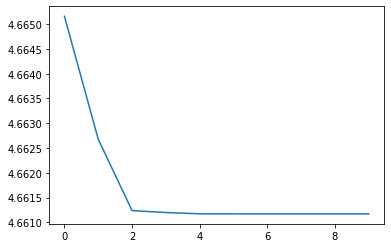

In [63]:
# POWER ITERATION
num_it = 10
it_value = np.zeros(num_it)
it_vector = np.ones(m)
for i in range(num_it):
    it_vector = np.dot(A,it_vector)
    it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value[i] = np.linalg.multi_dot([it_vector.T,A,it_vector])

print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

#### Rayleigh Quotient iterations

In [72]:
num_it = 100
it_values = []
it_vectors = []
M =A.copy()
# Try standard basis vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = 1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+2,10)] = 2
    it_vector[np.mod(i+4,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+2,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try vectors
for i in range(m):
    it_vector = np.ones(m) # initial vector guess
    it_vector[i] = -1
    it_vector[np.mod(i+1,10)] = -1
    it_vector[np.mod(i+4,10)] = -1
    it_vector[np.mod(i+5,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)
        
# Try these vectors
for i in range(m):
    it_vector = np.zeros(m) # initial vector guess
    it_vector[np.mod(i+1,10)] = 1
    it_vector[np.mod(i+2,10)] = 1
    it_vector[np.mod(i+3,10)] = -1
    it_vector[np.mod(i+4,10)] = 1
    it_vector[np.mod(i+6,10)] = -1
    it_vector[np.mod(i+8,10)] = -1
    it_vector[np.mod(i+9,10)] = -1
    singular = False
    for i in range(num_it):
        it_value = np.linalg.multi_dot([it_vector.T,M,it_vector])
        try:
            it_vector = np.dot(np.linalg.inv(M-it_value*np.eye(m)),it_vector)
        except:
            singular=True
            break
        it_vector = it_vector/np.linalg.norm(it_vector,2)
    it_value = np.round(it_value,9)
    if not singular and it_value not in set(it_values):
        
        it_values.append(it_value)
        it_vectors.append(it_vector)

# PRINT ALL EIGENVECTORS AND EIGENVALUES
print(len(it_values))
sorted(zip(it_values,it_vectors),reverse=True)

37


[(4.950267327,
  array([-0.28827149, -0.20869868, -0.30440231, -0.395821  , -0.17354739,
         -0.40770965, -0.1715858 , -0.26334541, -0.38580478, -0.42429436])),
 (0.610897451,
  array([ 0.03965242, -0.40698299,  0.25597679,  0.05024101, -0.07466244,
         -0.29921649, -0.22761935,  0.41319711, -0.49151828,  0.45332838])),
 (0.595092958,
  array([-0.01658184, -0.33658729,  0.24671782,  0.05077961, -0.01958207,
         -0.42917979, -0.16332218,  0.45555444, -0.47112593,  0.42689978])),
 (0.592826032,
  array([-0.02081421, -0.33077779,  0.24566404,  0.05074771, -0.01538529,
         -0.43840199, -0.15822217,  0.45810845, -0.46890844,  0.42428872])),
 (0.586307584,
  array([ 0.03311735,  0.31348108, -0.24231532, -0.05059707,  0.0031446 ,
          0.46476284,  0.14318821, -0.46502564,  0.46191629, -0.41620107])),
 (0.575845606,
  array([ 0.05423711,  0.28235126, -0.23556301, -0.05013477, -0.01801212,
          0.50844137,  0.11664716, -0.4751168 ,  0.44799336, -0.40056838])),
 (0.

#### Conclusion:
Power iterations still worked for a non-symmetric matrix and was able to find largest eigenvalue. However rayleigh quotient did not work for a non-symmetric matrix even with much higher number of iterations. One of the reasons is that rayleigh coefficient removes the information about non-symmetric part of matrix.

## Question 2

## a)

In [38]:
# THE FUNCTION TO READ THE IMAGES:
def read_pgm(pgmf):
    pgmf = open(pgmf, 'rb')
    """Return a raster of integers from a PGM as a list of lists."""
    assert pgmf.readline() == b'P5\n'
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    raster = []
    for y in range(height):
        row = []
        for y in range(width):
            row.append(ord(pgmf.read(1)))
        raster.append(row)
    return raster

In [39]:
# READ ALL THE IMAGES:
images = []
for root, dirs, files in os.walk("data/CroppedYale/"):
    for file in files:
        if file.endswith('.pgm'):
            im = resize(
                np.array(read_pgm(os.path.join(root, file))), (40, 40))
            images.append(im)
print(len(images))

2414


In [14]:
# OUR DATA MATRIX WHERE EACH IMAGE IS A ROW
data_cropped = np.array(images).reshape(len(images),1600)[:1600,:1600]
data_cropped.shape

(1600, 1600)

(array([959489., 243085., 276111., 300864., 280620., 220209., 139240.,
         77884.,  38178.,  24320.]),
 array([5.42101086e-20, 2.80808363e-18, 5.56195714e-18, 8.31583066e-18,
        1.10697042e-17, 1.38235777e-17, 1.65774512e-17, 1.93313247e-17,
        2.20851983e-17, 2.48390718e-17, 2.75929453e-17]),
 <a list of 10 Patch objects>)

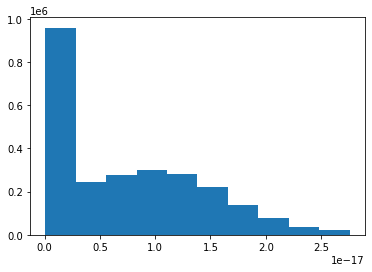

In [30]:
# Histogram of pixel values
plt.hist(data_cropped.flatten())

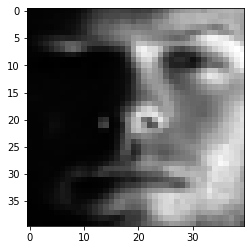

In [15]:
# EXAMPLE IMAGE
plt.imshow(data_cropped[-1,:].reshape(40,40),cmap=plt.get_cmap('gray'))

1.2010492940840582e-14
[0.01541512 0.00289186 0.01415538 ... 0.01613507 0.04139235 0.02366872]


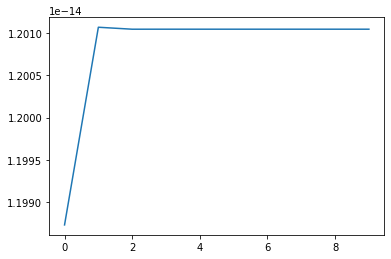

In [17]:
# POWER ITERATION
def power_iteration(A):
    m = A.shape[0]
    num_it = 10
    it_value = np.zeros(num_it)
    it_vector = np.ones(m)
    for i in range(num_it):
        it_vector = np.dot(A,it_vector)
        it_vector = it_vector/np.linalg.norm(it_vector,2)
        it_value[i] = np.linalg.multi_dot([it_vector.T,A,it_vector])
    return it_value,it_vector

it_value,it_vector = power_iteration(data_cropped)
print(it_value[-1])
print(it_vector)
plt.plot(it_value)  

In [32]:
# EIGENVALUES
np.linalg.eig(data_cropped)[0]

array([ 1.20104929e-14+0.00000000e+00j, -2.39395331e-16+2.91453222e-16j,
       -2.39395331e-16-2.91453222e-16j, ...,
       -7.37677384e-20+2.67740846e-20j, -7.37677384e-20-2.67740846e-20j,
        5.48848194e-20+0.00000000e+00j])

In [24]:
# SINGULAR VALUES
U,sigma,V= np.linalg.svd(data_cropped)
sigma

array([1.37062637e-14, 6.18536188e-15, 2.53385776e-15, ...,
       6.25596746e-21, 2.87848865e-21, 7.82099961e-22])

#### Observations: 
If we create a square matrix of images by pixels, then power iteration is able to find the largest real eigenvalue successfully by a few iterations. Leading SVD mode is different. This is expected given that this matrix is not hermitian. 

## b) Implementing random SVD

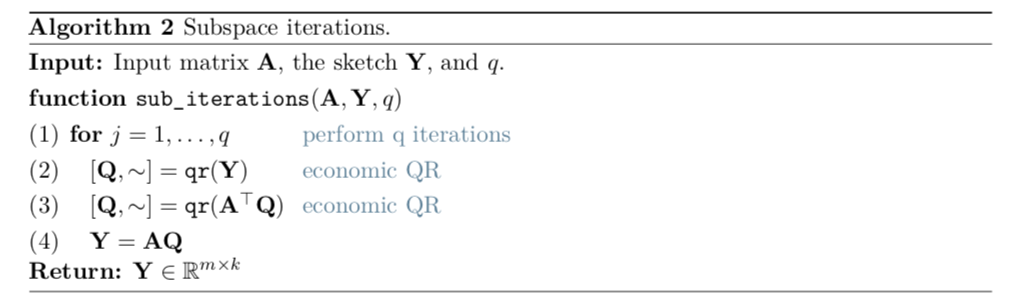

In [34]:
def sub_iterations(A,Y,q):
    for j in range(q):
        Q,_ = np.linalg.qr(Y)
        Q,_ = np.linalg.qr(np.dot(A.transpose(),Q))
        Y = np.dot(A,Q)
    return Y

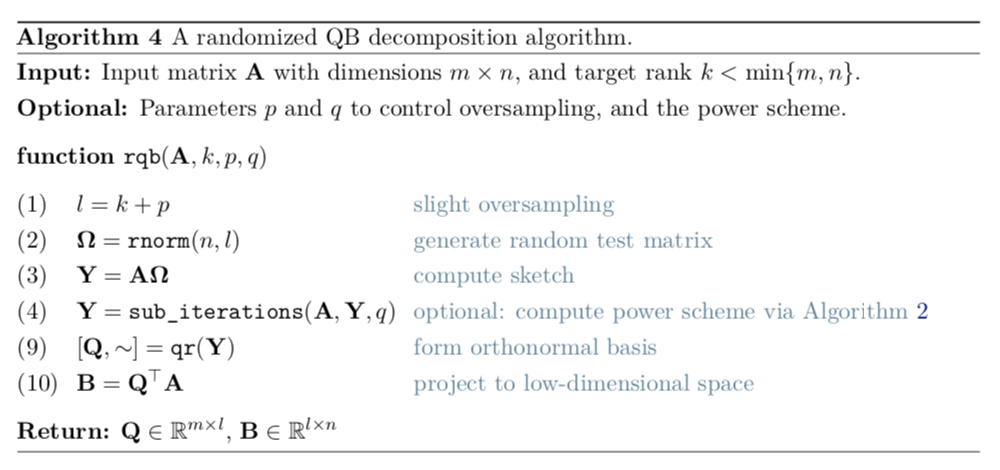

In [44]:
def rqb(A,k,p,q):
    l = k+p
    omega = np.random.randn(A.shape[1],l)
    Y = np.dot(A,omega)
    Y = sub_iterations(A,Y,q)
    Q,_ = np.linalg.qr(Y)
    B = np.dot(Q.transpose(),A)
    return Q,B

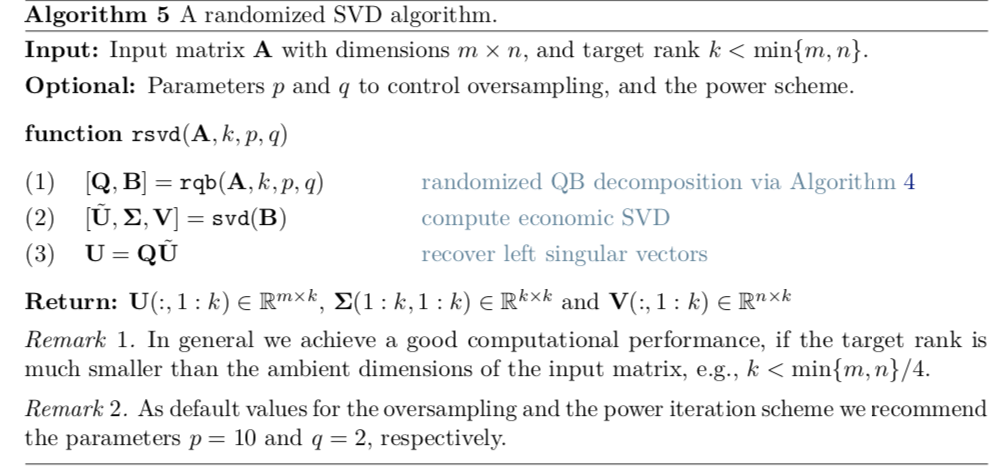

In [42]:
def rsvd(A,k,p,q):
    Q,B = rqb(A,k,p,q)
    U,sigma,V = np.linalg.svd(B)
    U = np.dot(Q,U)
    return U,sigma,V

In [46]:
U_random, sigma_random, V_random = rsvd(data_cropped,100,10,2)

### c) Comparison

In [64]:
((sigma[:110]-sigma_random)/sigma[:110])[:3]

array([1.26620502e-15, 7.65220454e-16, 9.16861004e-14])

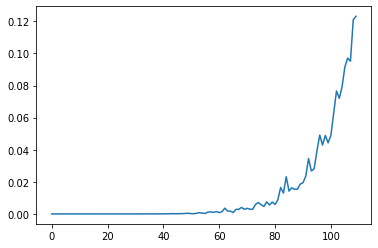

In [60]:
plt.plot((sigma[:110]-sigma_random)/sigma[:110])

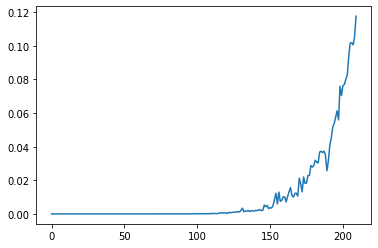

In [73]:
U_random, sigma_random, V_random = rsvd(data_cropped,200,10,2)
plt.plot((sigma[:210]-sigma_random)/sigma[:210])

#### Observation:
Although the relative error in calculation of singular values is very small for the first 40 or so large singular values, it starts to increase for the smaller ones and grows upto 12%. Interestingly, there is nothing special about choosing k=100. If we choose k=200, we can still observe the same effect. This is the reason why we oversample.

[Text(0, 0.5, 'Singular value'), Text(0.5, 0, 'Singular value index')]

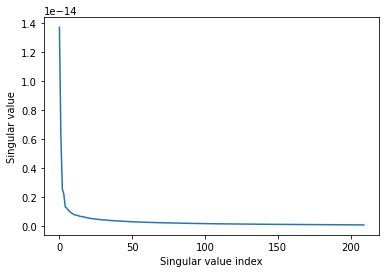

In [74]:
fig, ax1 = plt.subplots(1)
ax1.plot(sigma_random)
ax1.set(xlabel='Singular value index',ylabel='Singular value')

[Text(0, 0.5, 'Cumulative variation'),
 Text(0.5, 0, 'Num of randomized samples')]

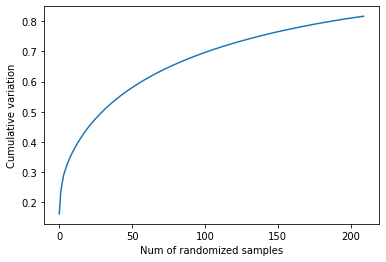

In [75]:
fig, ax1 = plt.subplots(1)
ax1.plot(np.cumsum(sigma_random/sigma.sum()))
ax1.set(xlabel='Num of randomized samples',ylabel='Cumulative variation')

### Observation:
We can see that singular values rapidly decay and the first 100 singular values account of 70% of the variation in pixel values.